<a href="https://colab.research.google.com/github/maferrepy/Titanic_kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Treino
# 2. Validação
# 3. Teste

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

# Nova seção

In [3]:
# Visualizado  o data frame.
treino.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Buscando VAlores ausentes.
treino.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
treino[['Cabin']]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [7]:
# Preencher valores Faltantes
treino['Cabin'].fillna('N00', inplace=True)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
#Criando um array Falso com numpy
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.random.seed(0)
X_falso = np.arange(10).reshape(-1, 1)  # Transforma X_falso em uma matriz de uma coluna
train_test_split(X_falso, test_size=0.5)

[array([[6],
        [7],
        [3],
        [0],
        [5]]),
 array([[2],
        [8],
        [4],
        [9],
        [1]])]

In [11]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

In [35]:
# Criando uma Coluna Sex_binario on sexo feminino = 1 e masculino =  2.
def transformar_sexo(valor):
  if valor == 'female':
    return 1
  else:
    return 2
treino['Sex_binario'] = treino['Sex'].map(transformar_sexo)


In [36]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N00,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N00,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N00,S,2


In [65]:
 treino[['Age','Sex_binario']]

,Age,Sex_binario
0,22.000000,2
1,38.000000,1
2,26.000000,1
3,35.000000,1
4,35.000000,2
...,...,...
886,27.000000,2
887,19.000000,1
888,29.699118,1
889,26.000000,2


In [66]:
grafico_idade = treino['Age']

In [67]:
grafico_idade.value_counts().sum()

891

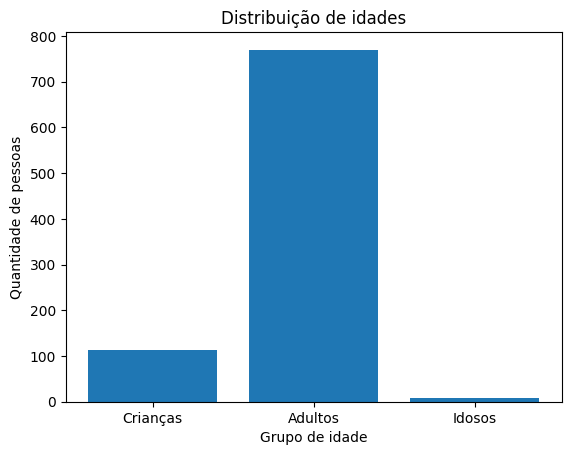

In [68]:


# Separa as idades em três grupos: crianças, adultos e idosos
criancas = treino[treino['Age'] < 18]
adultos = treino[(treino['Age'] >= 18) & (treino['Age'] <= 65)]
idosos = treino[treino['Age'] > 65]

# Cria um gráfico de barras com os três grupos
plt.bar(['Crianças', 'Adultos', 'Idosos'], [len(criancas), len(adultos), len(idosos)])
plt.xlabel('Grupo de idade')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de idades')
plt.show()

In [69]:
grafico_sexo = treino['Sex_binario']
print(grafico_sexo.value_counts().sum())

891


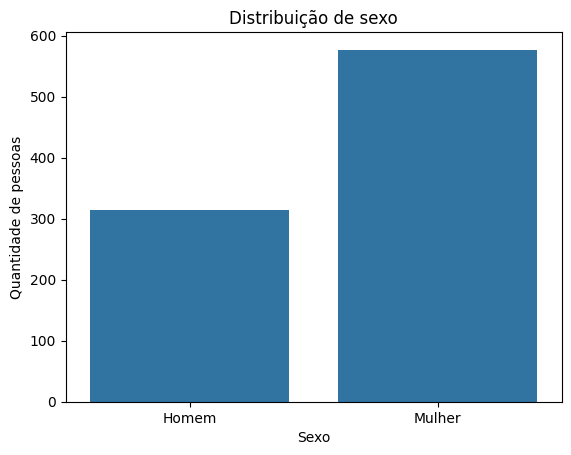

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um gráfico de countplot com seaborn
sns.countplot(x=grafico_sexo, data=treino)

# Adicione labels e título ao gráfico
plt.xlabel('Sexo')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de sexo')

# Adicione labels personalizados para os valores de sexo
plt.xticks([1, 0], ['Mulher', 'Homem'])

# Exiba o gráfico
plt.show()

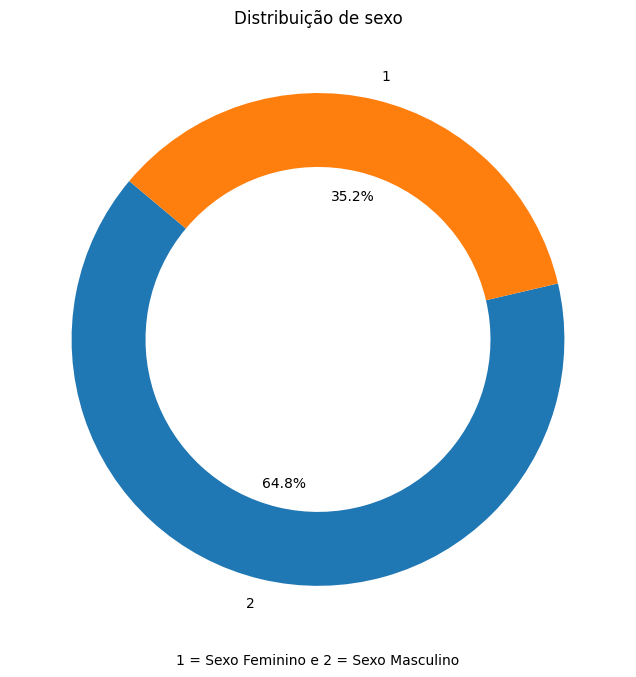

In [77]:
# Contar os valores de sexo
sexo_counts = treino['Sex_binario'].value_counts()

# Criar um gráfico de rosca
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})

# Adicionar título
plt.title('Distribuição de sexo')
plt.xlabel  ('1 = Sexo Feminino e 2 = Sexo Masculino')



# Exibir o gráfico
plt.show()

In [44]:
variaveis = ['Sex_binario','Age', ]

In [41]:
df = treino

In [42]:
X = treino[variaveis]
y = treino['Survived']

In [43]:
X.head()

,Sex_binario,Age
0,2,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,2,35.0


In [45]:
# criando uma coluna para menores de idade"crianças"
def transformar_idade(valor):
  if valor <= 16.0:
    return 1
  else:
    return 0

treino['Criança'] = treino['Age'].map(transformar_idade)

In [46]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,Criança
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N00,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N00,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N00,S,2,0


In [47]:
treino['Criança'].head().value_counts().sum()

5

In [48]:
treino['Age'].fillna(treino['Age'].mean(), inplace =True)

In [49]:
treino[['Criança', 'Age']].isna().sum()

Criança    0
Age        0
dtype: int64

In [50]:
treino.apply('Criança').sum()

100

In [51]:
filtro = X['Sex_binario'] > 0
X = X[filtro]


In [ ]:
# separando todas as mulheres

In [52]:
X.head()

,Sex_binario,Age
0,2,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,2,35.0


In [ ]:

X.describe()

,Sex_binario,Age
count,314.0,261.000000
mean,1.0,27.915709
std,0.0,14.110146
min,1.0,0.750000
25%,1.0,18.000000
50%,1.0,27.000000
75%,1.0,37.000000
max,1.0,63.000000


In [ ]:
X.fillna(-1)

,Sex_binario,Age
1,1,38.0
2,1,26.0
3,1,35.0
8,1,27.0
9,1,14.0
...,...,...
880,1,25.0
882,1,22.0
885,1,39.0
887,1,19.0


In [ ]:
treino.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Sex_binario    0
Criança        0
dtype: int64

In [ ]:
treino['Age'].fillna(treino['Age'].mean(), inplace =True)

In [ ]:
treino.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Sex_binario    0
Criança        0
dtype: int64

In [ ]:
variaveis = ['Sex_binario','Age']
X = treino[variaveis]
y = treino['Survived']

In [ ]:
modelo.fit(X, y)

RandomForestClassifier(n_jobs=1, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
y_pred = modelo.predict(X)

In [ ]:
cm = confusion_matrix(y, y)

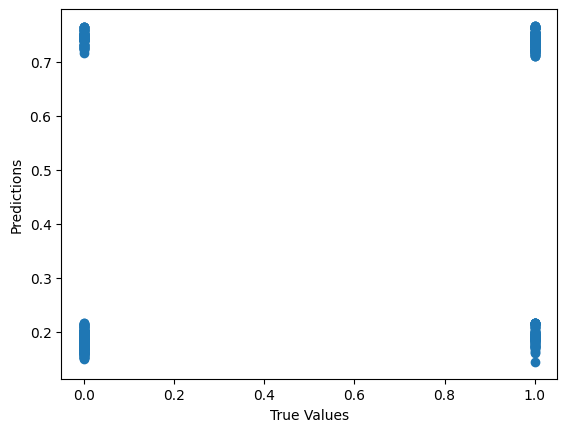

In [ ]:
y_pred = modelo.predict(X)

# Plotando resultados
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

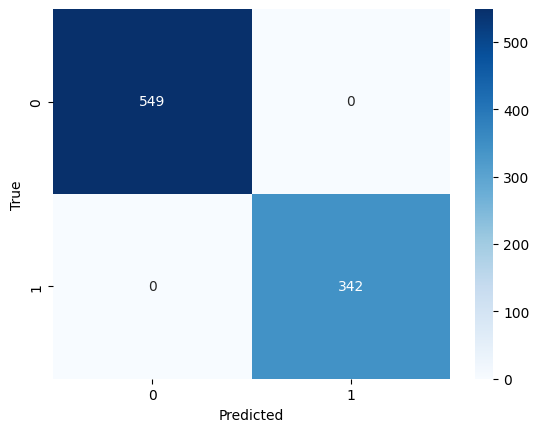

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fazendo previsões
y_pred = modelo.predict(X)

# Calculando métricas
accuracy = accuracy_score(y, y)
precision = precision_score(y, y)
recall = recall_score(y, y)
f1 = f1_score(y, y)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
# Supondo que modelo seja o objeto do modelo ajustado e X_test contém os dados de teste
previsoes = modelo.predict(X)  # Para modelos de regressão ou classificação
pontuacao = modelo.score(X, y)  # Para modelos de regressão ou classificação


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Supondo que modelo seja o objeto do modelo ajustado, X_test contém os dados de teste e y_test contém os rótulos de teste
previsoes = modelo.predict(X)
mse = mean_squared_error(y, previsoes)
r2 = r2_score(y, previsoes)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o MSE e o R²
mse = mean_squared_error(y, previsoes)
r2 = r2_score(y, previsoes)

# Visualizando as métricas
print("Mean Squared Error (MSE):", mse)
print("R²:", r2)


Mean Squared Error (MSE): 0.1665443430360558
R²: 0.2958148808902574


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
previsoes = modelo.predict(X)

In [ ]:
print("Previsões do modelo:")

print(previsoes)

Previsões do modelo:
[0.19662925 0.73315752 0.74405044 0.73588075 0.18482859 0.18964043
 0.16758146 0.21478412 0.7431427  0.75494336 0.7640208  0.71500265
 0.19844474 0.18119761 0.75494336 0.71772588 0.21478412 0.18964043
 0.73951172 0.74069259 0.18482859 0.18573633 0.75403562 0.19118279
 0.76038982 0.73315752 0.18964043 0.19935248 0.74069259 0.18964043
 0.18028987 0.74069259 0.74069259 0.15668854 0.19118279 0.17847438
 0.18964043 0.197537   0.75131239 0.75494336 0.73134203 0.7431427
 0.18964043 0.76492854 0.75040464 0.18964043 0.18964043 0.74069259
 0.18964043 0.75131239 0.2102454  0.197537   0.72317234 0.74132721
 0.15759628 0.18964043 0.74858916 0.19072892 0.76311305 0.20661443
 0.19662925 0.73315752 0.17575115 0.21296863 0.18964043 0.18964043
 0.74132721 0.19935248 0.75222013 0.19299828 0.18755182 0.75312787
 0.197537   0.19299828 0.18755182 0.19390602 0.18964043 0.18964043
 0.21584618 0.74041946 0.19662925 0.19027505 0.74069259 0.19118279
 0.75222013 0.73769623 0.20207571 0.189640

In [ ]:
teste['Sex_binario'] =teste['Sex'].map(transformar_sexo)


In [ ]:
X_prev = teste[variaveis]
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [ ]:
teste['Age'].fillna(teste['Age'].mean(), inplace =True)
teste['Pclass'].fillna(teste['Pclass'].mean(), inplace =True)

# Nova seção